<a href="https://colab.research.google.com/github/Shehab-Mechanical/codes/blob/main/facial_expressions_detection_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

In [ ]:
# importing the general dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings

warnings.filterwarnings('ignore')

In [ ]:
# Lets check what we have in our dataset

dataset_root = '/kaggle/input/affectnet-yolo-format/YOLO_format/'

for root, directories, files in os.walk(dataset_root):
    # Do something with the current directory path 'root'
    print("Current directory:", root)

    # Do something with the list of subdirectories 'directories'
    print("Subdirectories:", directories)

    # Do something with the list of files 'files'
    print("Files:", len(files))

Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/
Subdirectories: ['valid', 'test', 'train']
Files: 1
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/valid
Subdirectories: ['labels', 'images']
Files: 0
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/valid/labels
Subdirectories: []
Files: 5406
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/valid/images
Subdirectories: []
Files: 5406
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/test
Subdirectories: ['labels', 'images']
Files: 0
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/test/labels
Subdirectories: []
Files: 2755
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/test/images
Subdirectories: []
Files: 2755
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/train
Subdirectories: ['labels', 'images']
Files: 0
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/train/labels
Su

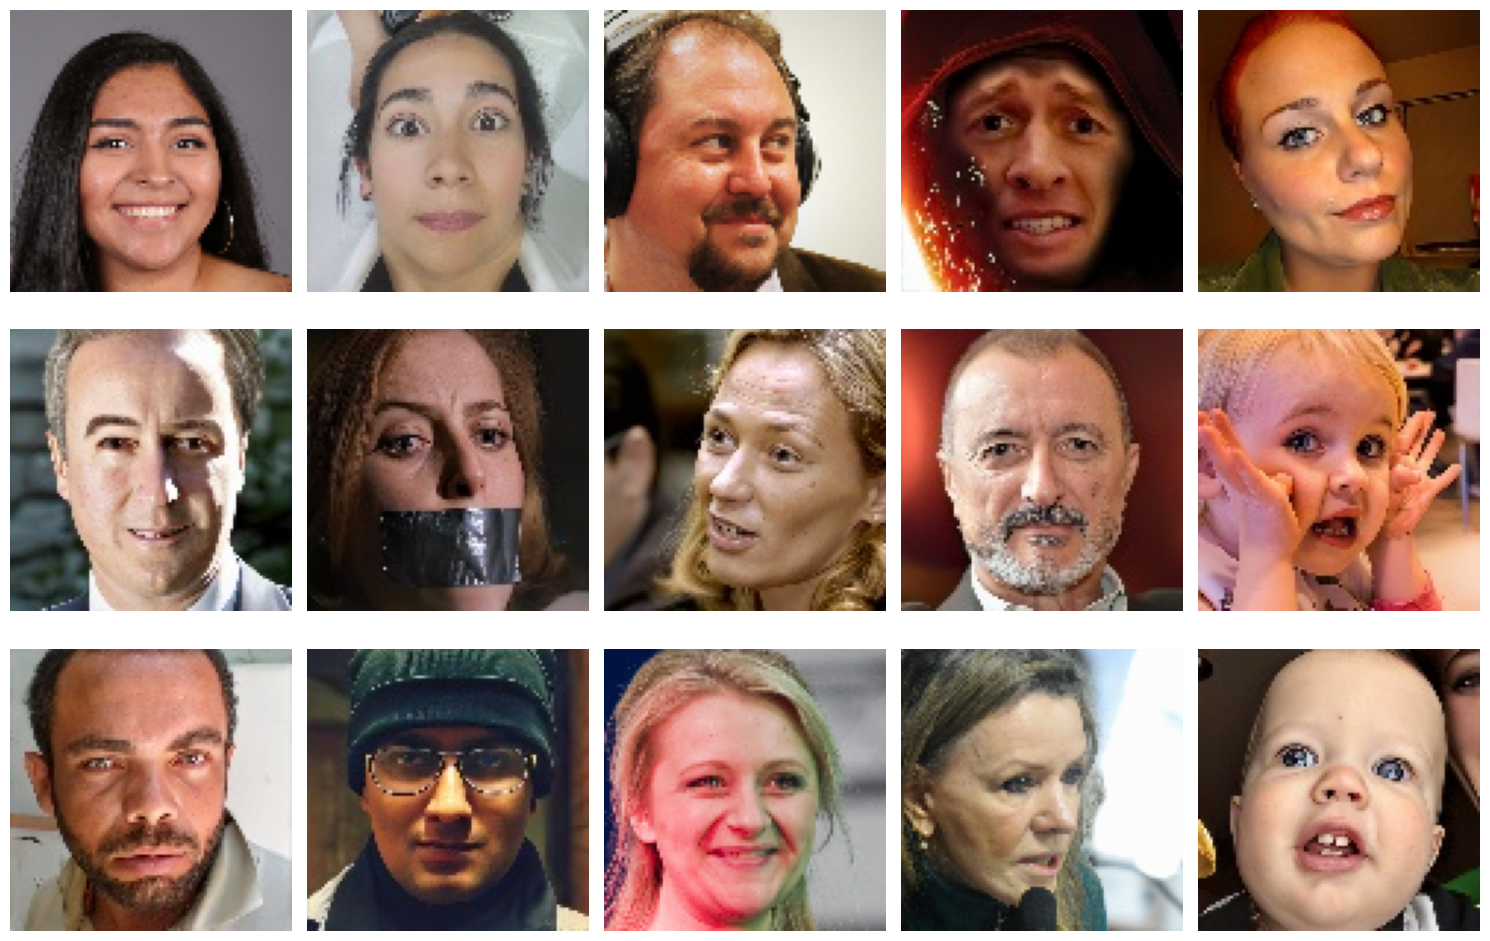

In [ ]:
# Lets observe some images from three folders

# Define the paths to the image folders
image_folders = [
    "/kaggle/input/affectnet-yolo-format/YOLO_format/valid/images",
    "/kaggle/input/affectnet-yolo-format/YOLO_format/test/images",
    "/kaggle/input/affectnet-yolo-format/YOLO_format/train/images"
]

# Define the number of images you want to display from each folder
num_images_per_folder = 5

# Create a subplot grid
fig, axes = plt.subplots(len(image_folders), num_images_per_folder, figsize=(15, 10))

# Loop through each image folder
for i, folder in enumerate(image_folders):
    image_files = os.listdir(folder)[:num_images_per_folder]  # Get the list of image files
    for j, image_file in enumerate(image_files):
        image_path = os.path.join(folder, image_file)
        try:
            # Open and display the image
            img = plt.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
        except Exception as e:
            print(f"Error opening image: {image_path}")

# Adjust layout
plt.tight_layout()
plt.show()

/kaggle/input/affectnet-yolo-format/YOLO_format/train/labels/ffhq_5410.txt
/kaggle/input/affectnet-yolo-format/YOLO_format/train/images/ffhq_5410.png


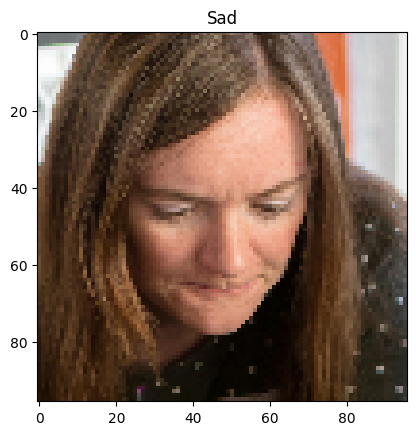

In [ ]:
# Lets observe an individual image with its corresponding label
labels_map = {
    '0' : 'Anger',
    '1' : 'Contempt',
    '2' : 'Disgust',
    '3' : 'Fear',
    '4' : 'Happy',
    '5' : 'Neutral',
    '6' : 'Sad',
    '7' : 'Surprise'
}

random_number = 333
train_images_path = '/kaggle/input/affectnet-yolo-format/YOLO_format/train/images'
random_image_path = os.path.join(train_images_path, os.listdir(train_images_path)[random_number])
random_image = plt.imread(random_image_path)

train_labels_path = '/kaggle/input/affectnet-yolo-format/YOLO_format/train/labels'
random_label_file = random_image_path.split('/')[-1].split('.')[0] + '.txt'
random_label_path = os.path.join(train_labels_path, random_label_file)

with open(random_label_path, 'r') as file:
    # first character is the label
    first_character = file.read(1)
image_class = labels_map[first_character]

print(random_label_path)
print(random_image_path)

plt.imshow(random_image)
plt.title(f'{image_class}')
plt.show()

In [ ]:
# Class frequencies
class_frequencies = np.array([])

# Define the paths to the image folders
label_folders = [
    "/kaggle/input/affectnet-yolo-format/YOLO_format/valid/labels",
    "/kaggle/input/affectnet-yolo-format/YOLO_format/test/labels",
    "/kaggle/input/affectnet-yolo-format/YOLO_format/train/labels"
]

# Iterate over each label directory (valid, test, train)
for label_dir in label_folders:

    # Iterate over each .txt file in the labels directory
    for file_name in os.listdir(label_dir):
        if file_name.endswith('.txt'):
            file_path = os.path.join(label_dir, file_name)

            # Read the first character of the file
            with open(file_path, 'r') as file:
                first_character = file.read(1)

        class_frequencies = np.append(class_frequencies, first_character)


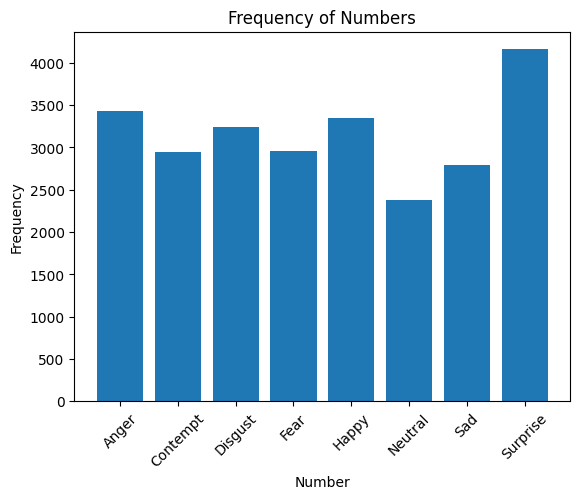

In [ ]:
unique, counts = np.unique(class_frequencies, return_counts=True)
unique_mapped = [labels_map[x] for x in unique]

# Create the bar plot
plt.bar(unique_mapped, counts)

# Add labels and title
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# YOLO Face Expression Detector

## Setup

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()

!yolo checks

Ultralytics YOLOv8.1.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5432.1/8062.4 GB disk)

OS                  Linux-5.15.133+-x86_64-with-glibc2.31
Environment         Kaggle
Python              3.10.13
Install             pip
RAM                 31.36 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

WARNING ⚠️ invalid check_version(None, >=3.3.0) requested, please check values.
matplotlib          ✅ None>=3.3.0
numpy               ✅ 1.26.3>=1.22.2
opencv-python       ✅ 4.9.0.80>=4.6.0
pillow              ✅ 9.5.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.12.0>=1.4.1
torch               ✅ 2.1.2>=1.8.0
torchvision         ✅ 0.16.2>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.7
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.2.0>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0

## Train the model with custom dataset

In [ ]:
import os
os.environ["WANDB_MODE"] = "disabled"

In [ ]:
!yolo task=detect \
mode=train \
model=yolov8s.pt \
data=/kaggle/input/affectnet-yolo-format/YOLO_format/data.yaml \
epochs=5 \
imgsz=640

Ultralytics YOLOv8.1.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/affectnet-yolo-format/YOLO_format/data.yaml, epochs=5, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

In [ ]:
os.listdir('/kaggle/working/runs/detect')

['train5', 'train6', 'train2', 'train', 'train8', 'train3', 'train4', 'train7']

In [ ]:
# last epochs outputs
os.listdir('/kaggle/working/runs/detect/train8')

['train_batch2.jpg',
 'val_batch0_pred.jpg',
 'val_batch2_labels.jpg',
 'results.csv',
 'confusion_matrix_normalized.png',
 'PR_curve.png',
 'P_curve.png',
 'val_batch1_pred.jpg',
 'args.yaml',
 'R_curve.png',
 'train_batch0.jpg',
 'val_batch2_pred.jpg',
 'labels_correlogram.jpg',
 'results.png',
 'F1_curve.png',
 'events.out.tfevents.1707496495.04444e684054.856.0',
 'weights',
 'train_batch1.jpg',
 'confusion_matrix.png',
 'val_batch1_labels.jpg',
 'val_batch0_labels.jpg',
 'labels.jpg']

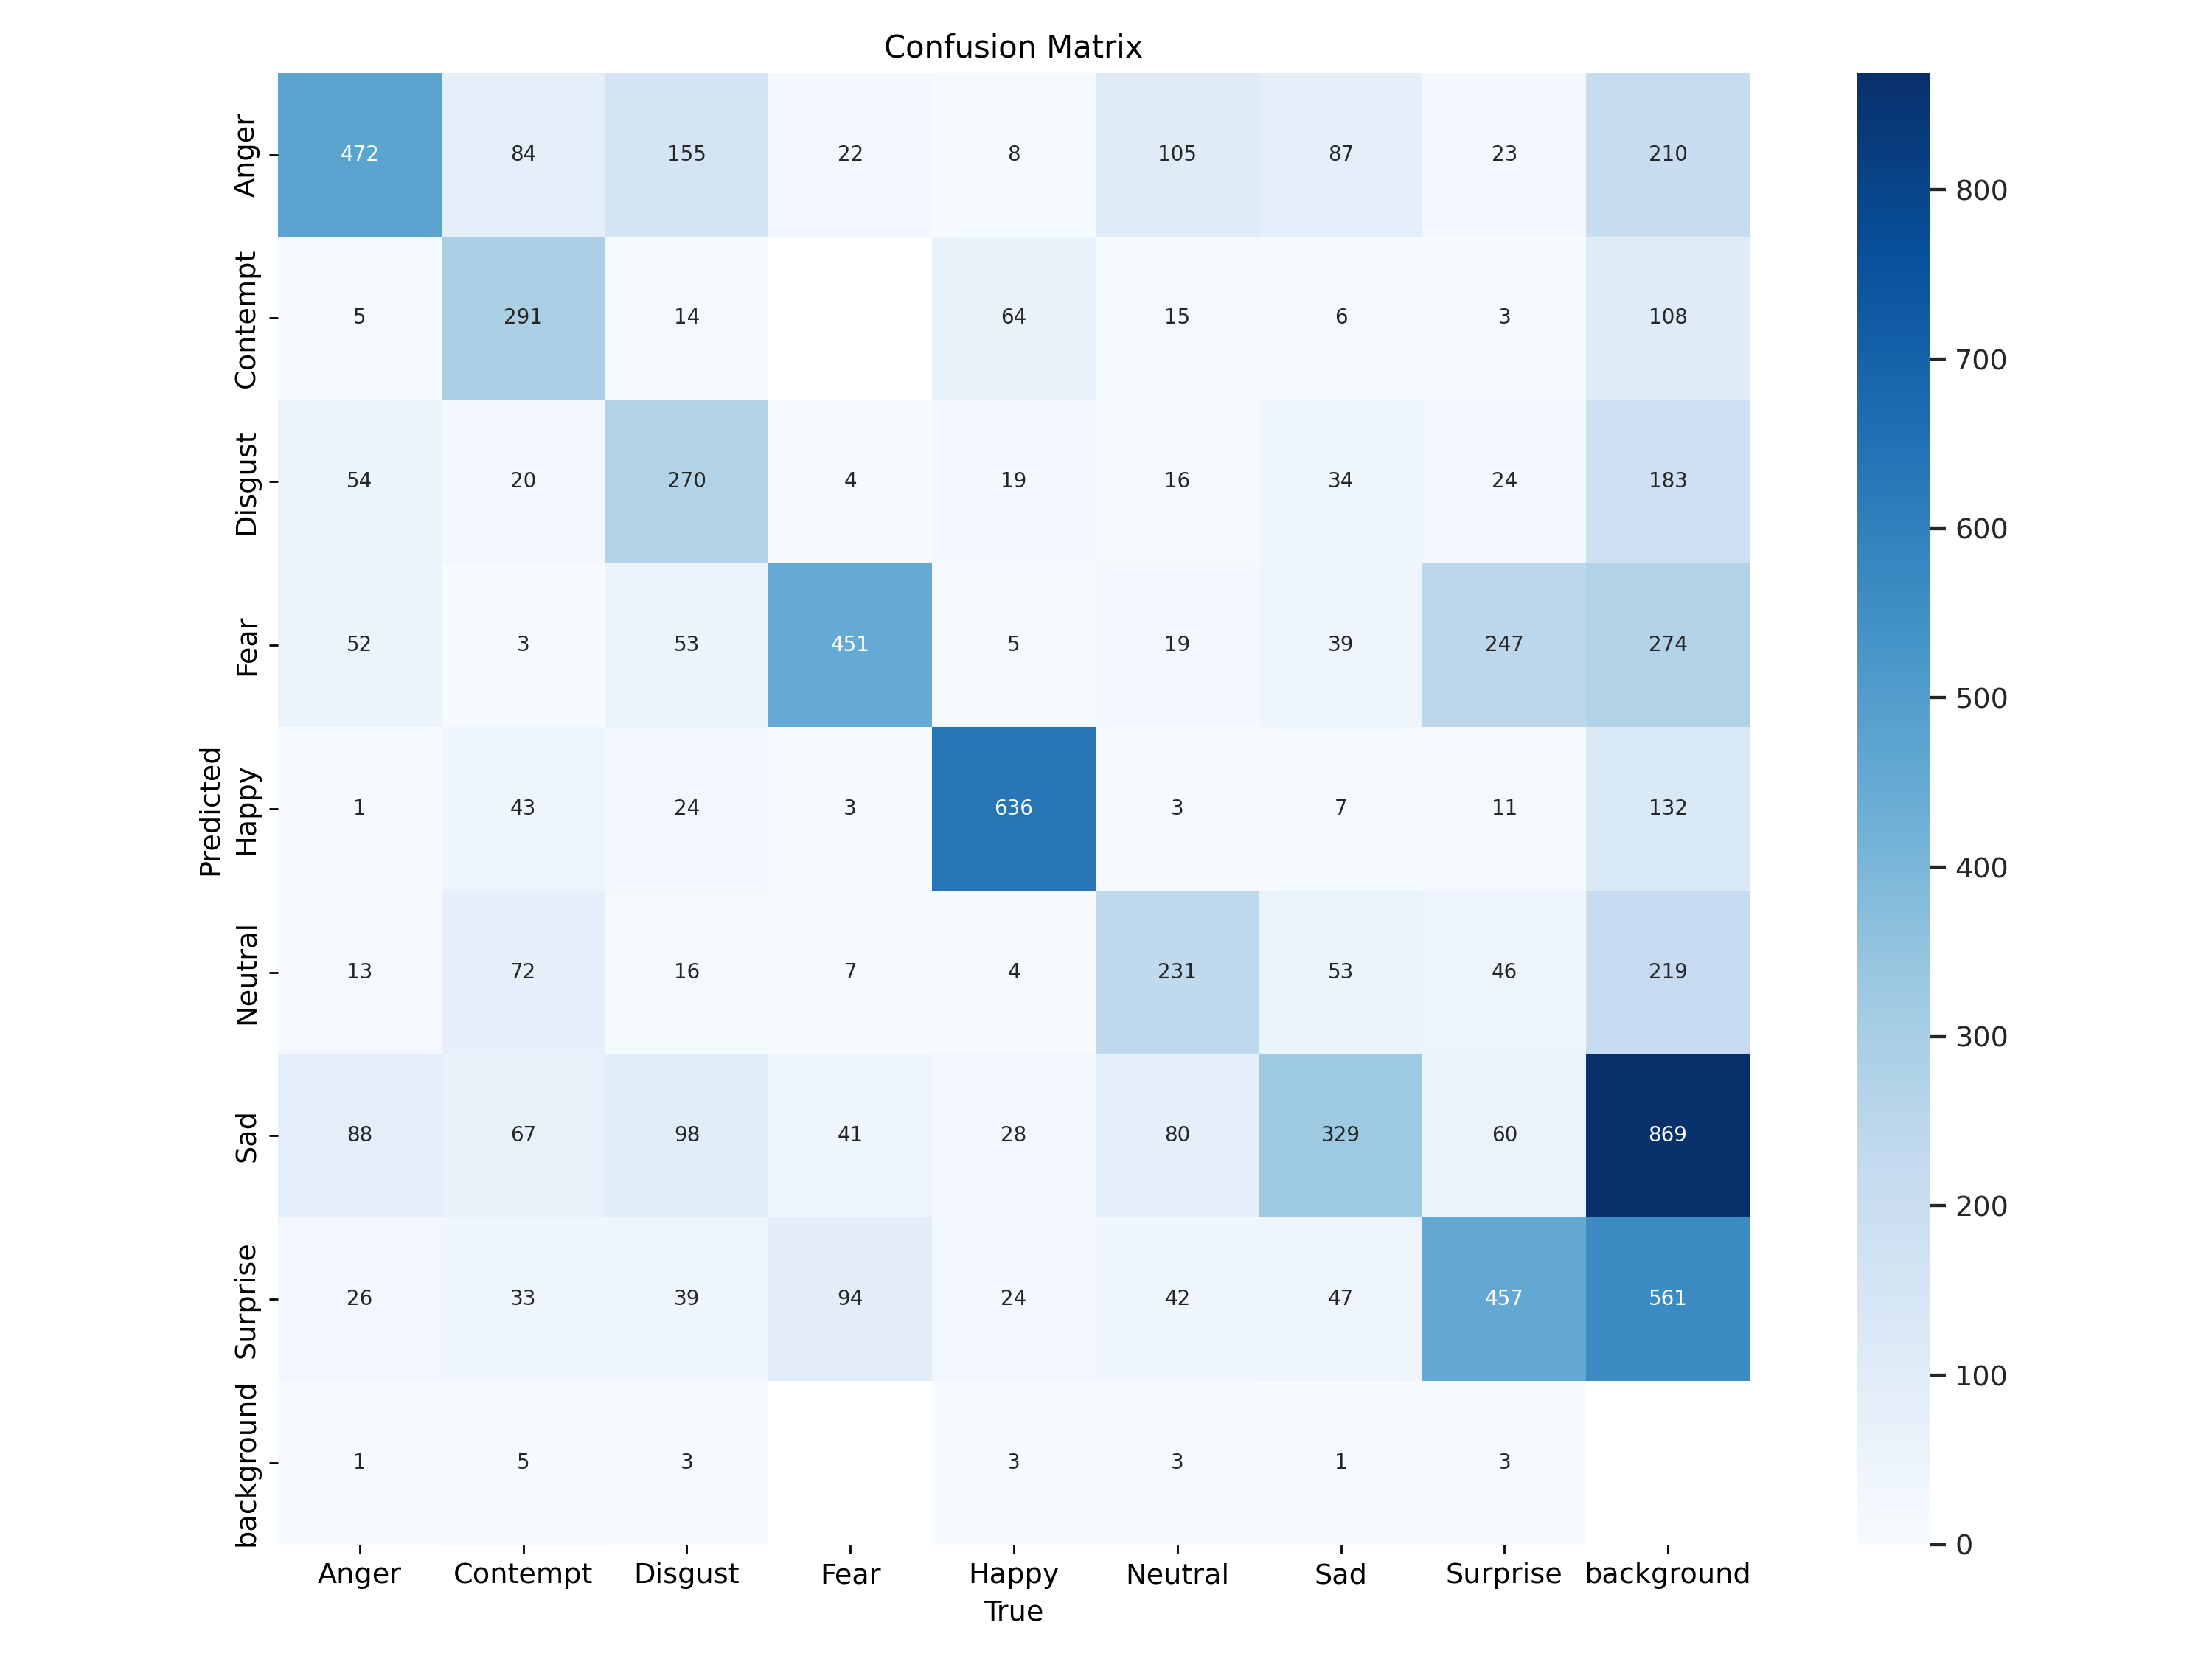

In [ ]:
Image(filename=f"/kaggle/working/runs/detect/train8/confusion_matrix.png", width=1000)

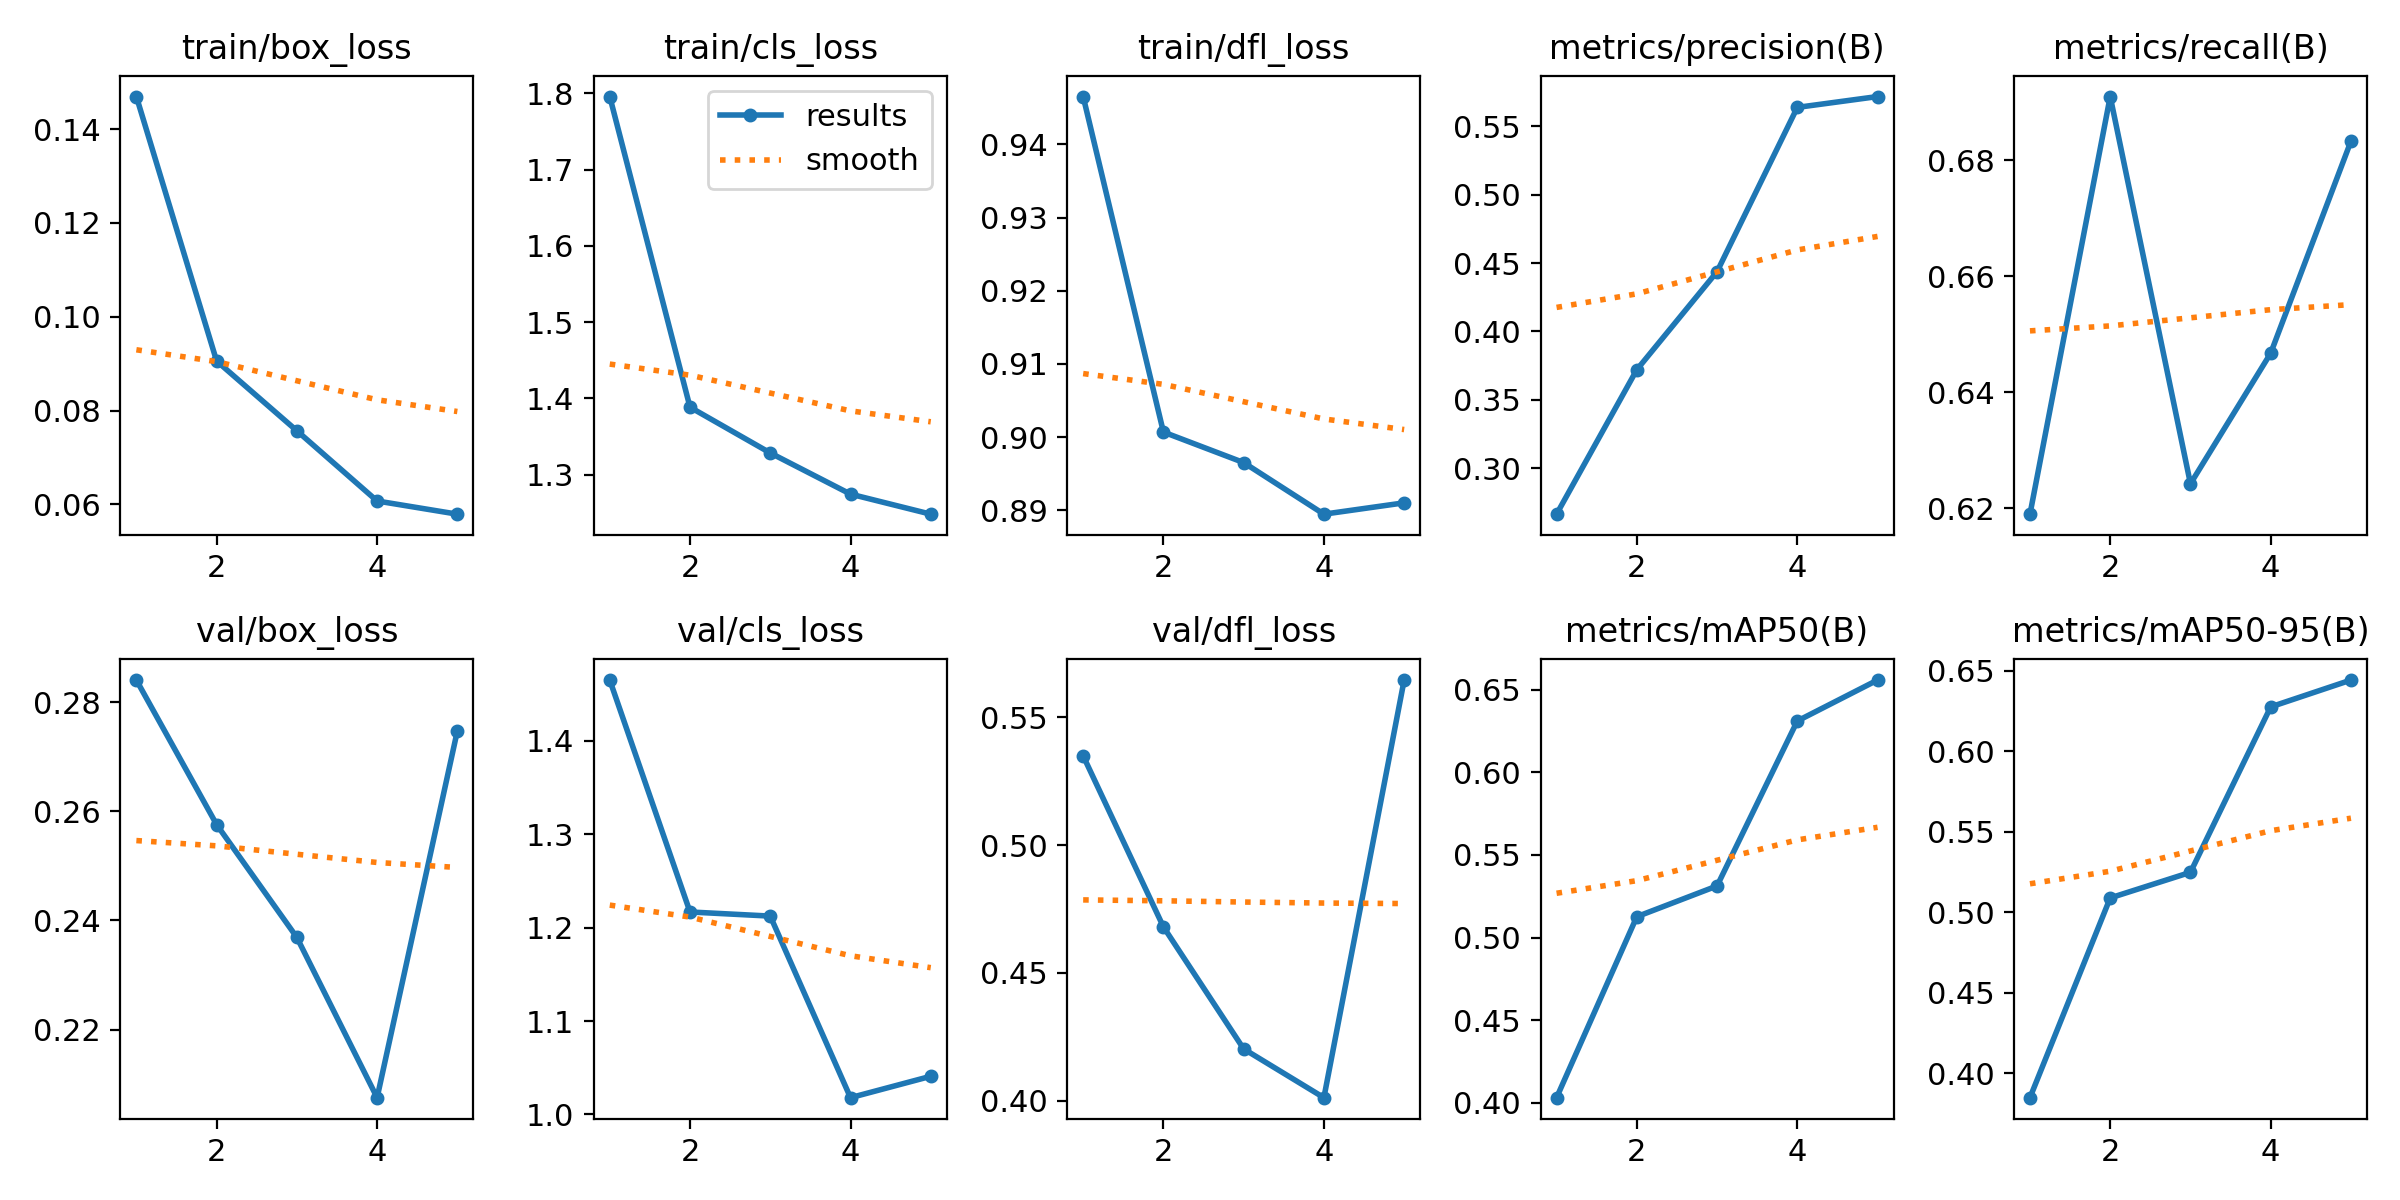

In [ ]:
Image(filename=f"/kaggle/working/runs/detect/train8/results.png", width=1000)

In [ ]:
!yolo task=detect \
mode=val \
model=/kaggle/working/runs/detect/train8/weights/last.pt \
data=/kaggle/input/affectnet-yolo-format/YOLO_format/data.yaml

Ultralytics YOLOv8.1.11 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /kaggle/input/affectnet-yolo-format/YOLO_format/valid/labels... 54
val: WARNING ⚠️ Cache directory /kaggle/input/affectnet-yolo-format/YOLO_format/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       5406       5406      0.572      0.683      0.656      0.644
                 Anger       5406        712      0.494      0.684      0.624      0.622
              Contempt       5406        618      0.743      0.543      0.695      0.689
               Disgust       5406        672       0.62      0.473      0.596      0.591
                  Fear       5406        622      0.492      0.791      0.672      0.665
                 Happy       5406        791      0.802      0.851      0.912      0.906
         

## Save the model

In [ ]:
!cp  my_model.pt

## Validate the Model

<generator object _walk at 0x7def8bd9fae0>

In [ ]:
!yolo task=detect \
mode=val \
model={HOME}/runs/detect/train/weights/best.pt \
data=/kaggle/input/affectnet-yolo-format/YOLO_format/data.yaml

Traceback (most recent call last):
  File "/opt/conda/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/cfg/__init__.py", line 541, in entrypoint
    model = YOLO(model, task=task)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 134, in __init__
    self._load(model, task=task)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/engine/model.py", line 215, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py", line 709, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/opt/conda/lib/python3.10/site-packages/ultralytics/nn/tasks.py", line 634, in torch_safe_load
    ckpt = torch.load(file, map_location="cpu")
  File "/opt/conda/lib/python3.10/site-packages/torch/serialization.py", line 986, in load
    with _open_file_like(f, 'rb') as opened_file:
 

## Predict

In [ ]:
yolo task=detect \
mode=predict \
model={HOME}/runs/detect/train/weights/best.pt \
conf=0.25 \
source=/kaggle/input/affectnet-yolo-format/YOLO_format/test/images

SyntaxError: invalid syntax (3635825418.py, line 1)